### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра математического моделирования и искусственного интеллекта

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 4

#### Дисциплина: Интеллектуальный анализ данных

##### Студент:  Стелина Петрити
##### Группа:   НПИбд-02-21

## Москва 2024
***

### Вариант № 9
1. Abalone Data Set
2. Название файла: abalone.data
3. Ссылка: http://archive.ics.uci.edu/ml/datasets/Abalone
4. Первый признак: Length (столбец No 2)
5. Второй признак: Diameter (столбец No 3)
6. Третий признак: Hight (столбец No 4)
7. Класс: Sex (столбец No 1)
8. Метод обработки пропущенных значений – среднее значение признака
9. Метод нормализации признаков – стандартизация
10. Алгоритм снижения размерности данных – удаление признака с самой низкой дисперсией
11. Метод валидации модели – повторяющиеся случайные разбиения на обучающую и тестовую выборки по 5 блокам
12. Показатель качества модели – полнота (recall)






In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 1.	Считайте из заданного набора данных репозитария UCI значения трех признаков и метки класса.

In [ ]:
import pandas as pd

# Задаем путь к файлу
path = '/content/drive/MyDrive/viti 4/Data mining/Lab 4/abalone.data'

# Загружаем данные
data = pd.read_csv(path, header=None)

# Выбираем нужные столбцы
features = data[[0, 1, 2, 3]]  # Столбцы 1 (Sex), 2 (Length) и 3 (Diameter) 4(Hight)
features.columns = [ 'Sex', 'Length', 'Diameter', 'Hight' ]  # Переименовываем столбцы для удобства

# Извлекаем признаки и метку класса
X = features[['Length', 'Diameter', 'Hight']]# Признаки
y = features['Sex']  # Метка класса

# Выводим первые несколько строк, чтобы убедиться, что данные загружены корректно
print(X.head())
print(y.head())


   Length  Diameter  Hight
0   0.455     0.365  0.095
1   0.350     0.265  0.090
2   0.530     0.420  0.135
3   0.440     0.365  0.125
4   0.330     0.255  0.080
0    M
1    M
2    F
3    M
4    I
Name: Sex, dtype: object


###2. Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Если в признаках имеются пропущенные значения, то замените пропущенные значения, используя метод, указанный в индивидуальном задании. Если пропущенные значения в наборе данных отсутствуют, то определите и удалите точки с выбросами при помощи стандартизованной оценки (Z-score) . Выберите параметры стандартизованной оценки таким образом, чтобы выбросы составляли от 1% до 10% всех точек набора данных. Если количество различных меток классов превышает 4, то уменьшите количество классов.


In [ ]:
import numpy as np
from scipy import stats

# Удаление строк с отсутствующими значениями метки класса (Sex)
data_clean = features.dropna(subset=['Sex'])

# Замена отсутствующих значений признаков для указанных столбцов средним значением каждого столбца
X_fill = data_clean[['Length', 'Diameter', 'Hight']].fillna(data_clean[['Length', 'Diameter', 'Hight']].mean())

# Обнаружение и удаление выбросов с использованием Z-оценки для указанных столбцов
z_scores = np.abs(stats.zscore(X_fill))

# Установка порога Z-оценки для удаления от 1% до 10% выбросов
percent = 90  # Этот параметр можно настроить между 90 и 99, чтобы удалить от 1% до 10% выбросов
thresholds = np.percentile(z_scores, percent, axis=0)  # Вычисление порога для каждого столбца

# Идентификация строк, которые являются выбросами в любых из указанных столбцов
outliers = (z_scores > thresholds).any(axis=1)
no_outliers = data_clean[~outliers]

# Уменьшение количества классов до 4, если это необходимо
if len(no_outliers['Sex'].unique()) > 4:
    count_classes = no_outliers['Sex'].value_counts()
    top_classes = count_classes.index[:4]  # Выбор 4 самых частых классов
    no_outliers['Sex'] = no_outliers['Sex'].apply(lambda x: x if x in top_classes else 'Other')

# Вывод очищенных данных
print(no_outliers.head())


  Sex  Length  Diameter  Hight
0   M   0.455     0.365  0.095
1   M   0.350     0.265  0.090
2   F   0.530     0.420  0.135
3   M   0.440     0.365  0.125
4   I   0.330     0.255  0.080


###3. Нормализуйте признаки набора данных методом, указанным в индивидуальном задании.


In [ ]:
from sklearn.preprocessing import StandardScaler

# Нормализация признаков методом стандартизации
scaler = StandardScaler()
X_standardized = scaler.fit_transform(no_outliers[['Length', 'Diameter', 'Hight']])

# Преобразуем результат обратно в DataFrame для удобства
no_outliers.loc[:, ['Length', 'Diameter', 'Hight']] = X_standardized

# Вывод нормализованных данных
print(no_outliers[['Length', 'Diameter', 'Hight']].head())


     Length  Diameter     Hight
0 -0.915168 -0.717877 -1.601619
1 -2.077279 -2.050085 -1.771683
2 -0.085088  0.014837 -0.241109
3 -1.081184 -0.717877 -0.581236
4 -2.298634 -2.183306 -2.111811


###4. Визуализируйте набор данных в виде точек трехмерного пространства с координатами, соответствующими трем признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных


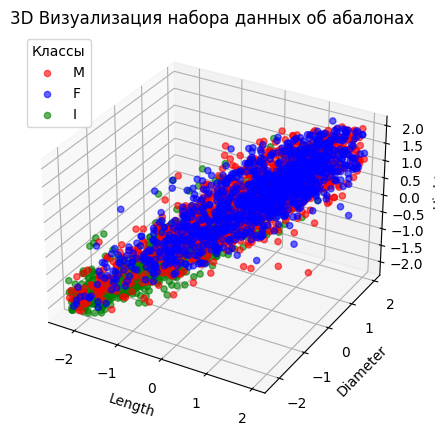

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Подготовка данных для построения графика
X_plot = no_outliers[['Length', 'Diameter', 'Hight']]
y_plot = no_outliers['Sex']

# Создание фигуры и 3D-оси
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')

# Определение цветовой карты для разных классов
colors = {'M': 'red', 'F': 'blue', 'I': 'green', 'Other': 'purple'}

# Построение графика для каждого класса с соответствующим цветом
for class_label in y_plot.unique():
    ax.scatter(X_plot[y_plot == class_label]['Length'],
               X_plot[y_plot == class_label]['Diameter'],
               X_plot[y_plot == class_label]['Hight'],
               label=class_label,
               color=colors.get(class_label, 'gray'),
               alpha=0.6)

# Подписи к осям
ax.set_xlabel('Length')
ax.set_ylabel('Diameter')
ax.set_zlabel('Hight')
ax.set_title('3D Визуализация набора данных об абалонах')

# Создание легенды
ax.legend(title='Классы', loc='upper left')

# Показ графика
plt.show()


###5. Используя алгоритм снижения размерности данных, указанный в индивидуальном задании, уменьшите размерность признакового пространства до двух и визуализируйте набор данных в виде точек на плоскости, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных.

Удаляем признак с наименьшей дисперсией: Diameter


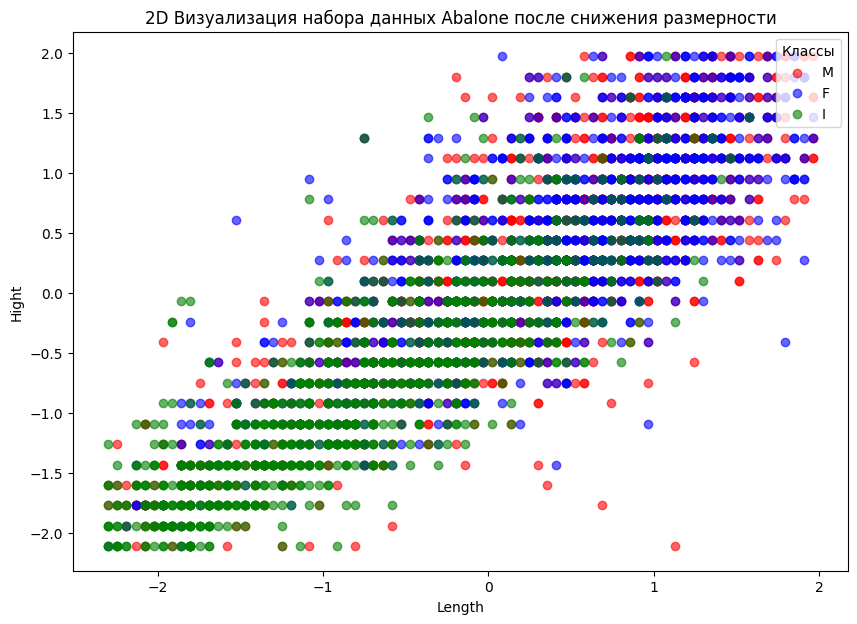

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Вычисление дисперсии и удаление признака с самой низкой дисперсией
features_remove = no_outliers[['Length', 'Diameter', 'Hight']].var()
low_variance_feature = features_remove.idxmin()  # Найти признак с минимальной дисперсией
print(f"Удаляем признак с наименьшей дисперсией: {low_variance_feature}")

# Удаление признака с самой низкой дисперсией
features_removed = no_outliers.drop(columns=[low_variance_feature])

# Извлечение оставшихся двух признаков и меток классов для визуализации
X_2d_plot = features_removed[['Length', 'Hight']]  # Оставляем два оставшихся признака
y_2d_plot = features_removed['Sex']  # Метки классов

# Шаг 4: Визуализация данных в 2D с окраской точек по классам
plt.figure(figsize=(10, 7))
colors = {'M': 'red', 'F': 'blue', 'I': 'green', 'Other': 'purple'}

# Шаг 5: Отображение каждой группы классов разным цветом
for class_label in y.unique():
    plt.scatter(X_2d_plot[y_2d_plot == class_label]['Length'],
                X_2d_plot[y_2d_plot == class_label]['Hight'],
                label=class_label,
                color=colors.get(class_label, 'gray'),
                alpha=0.6)

# Подпись осей и заголовка
plt.xlabel('Length')
plt.ylabel('Hight')
plt.title('2D Визуализация набора данных Abalone после снижения размерности')

# Создание легенды
plt.legend(title='Классы', loc='upper right')

# Отображение графика
plt.show()


###6. Используя разделение набора данных из двух признаков на обучающую и тестовую выборки в соотношении 75% на 25%, проведите классификацию тестовой выборки с помощью метода К ближайших соседей для различных значений К<10 и определите оптимальное значение параметра К с минимальной долей ошибок.



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Разделение данных на обучающую и тестовую выборки (75% - обучение, 25% - тест)
X_K = features_removed[['Length', 'Hight']]  # Признаки после удаления столбца с наименьшей дисперсией
y_K = features_removed['Sex']  # Метки классов

X_train, X_test, y_train, y_test = train_test_split(X_K, y_K, test_size=0.25, random_state=42)

# Классификация с использованием метода K ближайших соседей
error_rate = []

# Проверяем значения K от 1 до 9
for k in range(1, 10):
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN.fit(X_train, y_train)
    y_pred = KNN.predict(X_test)

    # Вычисляем процент ошибок
    error = 1 - accuracy_score(y_test, y_pred)
    error_rate.append(error)

# Поиск оптимального значения K
K_optimal = np.argmin(error_rate) + 1  # +1 потому что индексация в массиве начинается с 0
print(f"Оптимальное значение K: {K_optimal}")

Оптимальное значение K: 4


###7. Для найденного значения K постройте и выведите на экран отчет о классификации и матрицу ошибок


Отчет о классификации для K = 4:

              precision    recall  f1-score   support

           F       0.42      0.44      0.43       312
           I       0.53      0.62      0.57       253
           M       0.42      0.35      0.38       337

    accuracy                           0.46       902
   macro avg       0.46      0.47      0.46       902
weighted avg       0.45      0.46      0.45       902

Матрица ошибок:
 [[138  57 117]
 [ 52 157  44]
 [140  80 117]]


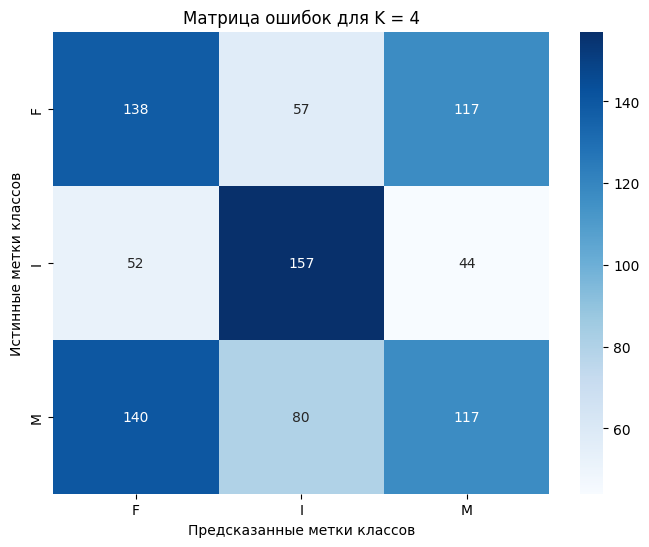

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Обучение модели с оптимальным K
KNN_optimal = KNeighborsClassifier(n_neighbors=K_optimal)
KNN_optimal.fit(X_train, y_train)

# Прогнозирование на тестовой выборке
y_pred_KNN = KNN_optimal.predict(X_test)

# Вывод отчета о классификации
print(f"Отчет о классификации для K = {K_optimal}:\n")
print(classification_report(y_test, y_pred_KNN))

# Вычисление и вывод матрицы ошибок
matrix = confusion_matrix(y_test, y_pred_KNN)
print("Матрица ошибок:\n", matrix)

# Визуализация матрицы ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_K), yticklabels=np.unique(y_K))
plt.title(f'Матрица ошибок для K = {K_optimal}')
plt.xlabel('Предсказанные метки классов')
plt.ylabel('Истинные метки классов')
plt.show()


###8. Создайте модели классификации точек набора данных из трех признаков на базе следующих классификаторов:
* наивного байесовского классификатора
* классификатора метода К ближайших соседей для значения К, определенного в п. 6.



In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Использование всех трех признаков
X_ft = no_outliers[['Length', 'Diameter', 'Hight']]  # Используем все три признака
y_cl = no_outliers['Sex']  # Метки классов

# Разделение данных на обучающую и тестовую выборки (75% - обучение, 25% - тест)
X_train_ft, X_test_ft, y_train_cl, y_test_cl = train_test_split(X_ft, y_cl, test_size=0.25, random_state=42)

# 1. Наивный байесовский классификатор
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_ft, y_train_cl)
y_pred_nb = nb_classifier.predict(X_test_ft)

# Вывод отчета о классификации и матрицы ошибок для наивного байесовского классификатора
print("Отчет о классификации для наивного байесовского классификатора:\n")
print(classification_report(y_test_cl, y_pred_nb))

conf_matrix_nb = confusion_matrix(y_test_cl, y_pred_nb)
print("Матрица ошибок для наивного байесовского классификатора:\n", conf_matrix_nb)

Отчет о классификации для наивного байесовского классификатора:

              precision    recall  f1-score   support

           F       0.51      0.39      0.44       312
           I       0.53      0.68      0.59       253
           M       0.42      0.43      0.43       337

    accuracy                           0.49       902
   macro avg       0.49      0.50      0.49       902
weighted avg       0.48      0.49      0.48       902

Матрица ошибок для наивного байесовского классификатора:
 [[123  64 125]
 [ 12 171  70]
 [106  87 144]]


In [ ]:
# 2. Классификатор K ближайших соседей с оптимальным K
KNN_optimal = KNeighborsClassifier(n_neighbors=K_optimal)
KNN_optimal.fit(X_train_ft, y_train_cl)
y_pred_knn = KNN_optimal.predict(X_test_ft)

# Вывод отчета о классификации и матрицы ошибок для K ближайших соседей
print("Отчет о классификации для K ближайших соседей (K = {}):\n".format(K_optimal))
print(classification_report(y_test_cl, y_pred_knn))

conf_matrix_knn = confusion_matrix(y_test_cl, y_pred_knn)
print("Матрица ошибок для K ближайших соседей:\n", conf_matrix_knn)

Отчет о классификации для K ближайших соседей (K = 4):

              precision    recall  f1-score   support

           F       0.36      0.47      0.41       290
           I       0.53      0.64      0.58       249
           M       0.43      0.28      0.34       363

    accuracy                           0.44       902
   macro avg       0.44      0.46      0.44       902
weighted avg       0.44      0.44      0.43       902

Матрица ошибок для K ближайших соседей:
 [[135  62  93]
 [ 52 159  38]
 [186  77 100]]


###9. Используя указанный в индивидуальном задании метод валидации модели, проведите для набора данных из трех признаков оценку качества классификаторов из п. 8 относительно показателя, указанного в индивидуальном задании, и выведите на экран среднее значение и дисперсию этого показателя.


In [ ]:
from sklearn.metrics import recall_score

# Количество повторений
n_iterations = 5
recall_nb = []
recall_knn = []

# Обучение и тестирование с повторяющимися случайными разбиениями
for _ in range(n_iterations):
    # Разделение данных на обучающую и тестовую выборки (75% - обучение, 25% - тест)
    X_train_ft, X_test_ft, y_train_cl, y_test_cl = train_test_split(X_ft, y_cl, test_size=0.25, random_state=None)

    # 1. Наивный байесовский классификатор
    nb_classifier = GaussianNB()
    nb_classifier.fit(X_train_ft, y_train_cl)
    y_pred_nb = nb_classifier.predict(X_test_ft)

    # Вычисление полноты (recall) для наивного байесовского классификатора
    recall_nb.append(recall_score(y_test_cl, y_pred_nb, average='weighted'))

    # 2. Классификатор K ближайших соседей с оптимальным K
    KNN_optimal = KNeighborsClassifier(n_neighbors=K_optimal)
    KNN_optimal.fit(X_train_ft, y_train_cl)
    y_pred_knn = KNN_optimal.predict(X_test_ft)

    # Вычисление полноты (recall) для K ближайших соседей
    recall_knn.append(recall_score(y_test_cl, y_pred_knn, average='weighted'))

# Расчет среднего значения и дисперсии полноты для каждого классификатора
mean_recall_nb = np.mean(recall_nb)
variance_recall_nb = np.var(recall_nb)

mean_recall_knn = np.mean(recall_knn)
variance_recall_knn = np.var(recall_knn)

# Вывод результатов
print(f"Наивный байесовский классификатор:\n Среднее значение полноты: {mean_recall_nb:.4f}\n Дисперсия полноты: {variance_recall_nb:.4f}\n")
print(f"K ближайших соседей (K = {K_optimal}):\n Среднее значение полноты: {mean_recall_knn:.4f}\n Дисперсия полноты: {variance_recall_knn:.4f}\n")


Наивный байесовский классификатор:
 Среднее значение полноты: 0.4756
 Дисперсия полноты: 0.0007

K ближайших соседей (K = 4):
 Среднее значение полноты: 0.4541
 Дисперсия полноты: 0.0003



###10. Определите, какой из классификаторов позволяет получить более высокое среднее значение показателя классификации, проведите классификацию точек набора данных этим классификатором и визуализируйте набор данных в виде точек трехмерного пространства с координатами, соответствующими трем признакам, отображая точки различных прогнозируемых классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных.




In [ ]:
# Использование всех трех признаков из no_outliers
X_ft = no_outliers[['Length', 'Diameter', 'Hight']]  # Используем все три признака
y_cl = no_outliers['Sex']  # Метки классов

# Определите классификатор с более высоким средним значением полноты
if mean_recall_nb > mean_recall_knn:
    best_classifier = 'Наивный Байесовский'
    final_classifier = GaussianNB()
else:
    best_classifier = 'KNN'
    final_classifier = KNeighborsClassifier(n_neighbors=K_optimal)

# Обучение классификатора на всем наборе данных
final_classifier.fit(X_ft, y_cl)
y_final_pred = final_classifier.predict(X_ft)

print(f"Лучший классификатор: {best_classifier}")

Лучший классификатор: Наивный Байесовский


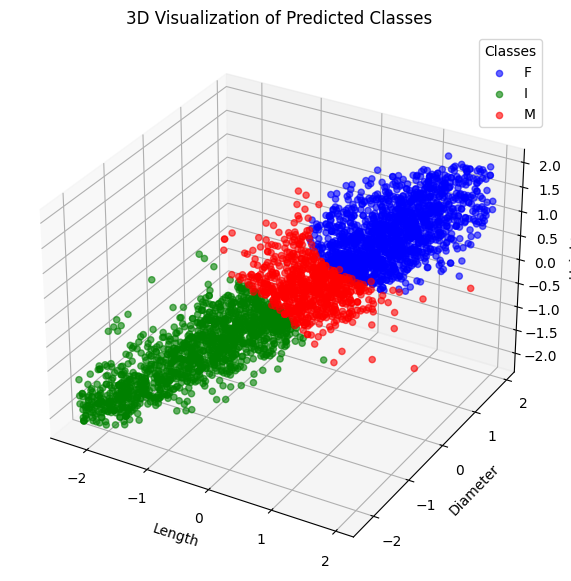

In [ ]:
# Визуализация в 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Задание цветов для различных классов
colors = {'M': 'red', 'F': 'blue', 'I': 'green', 'Other': 'purple'}

# Отображение точек с соответствующими цветами
for labels in np.unique(y_pred_final):
    ax.scatter(X_ft['Length'][y_final_pred == labels],
               X_ft['Diameter'][y_final_pred == labels],
               X_ft['Hight'][y_final_pred == labels],
               label=labels,
               color=colors.get(labels, 'gray'),
               alpha=0.6)

# Подпись осей и заголовка
ax.set_xlabel('Length')
ax.set_ylabel('Diameter')
ax.set_zlabel('Height')
ax.set_title('3D Visualization of Predicted Classes')

# Создание легенды
ax.legend(title='Classes', loc='upper right')

# Показать график
plt.show()
